# Automated Face Detection & Morphing

## Setup

In [67]:
import delaunay
import cv2
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
reload(delaunay)

<module 'delaunay' from '/Users/akshaynair/Downloads/CS445FinalProject/delaunay.py'>

## Face detection in images

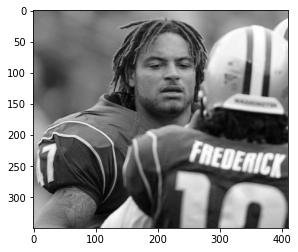

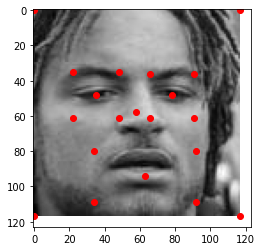

In [68]:
image = cv2.cvtColor(cv2.imread('img_341.jpg'), cv2.COLOR_BGR2GRAY)
faces = delaunay.detect_faces(image)
face_images = delaunay.crop_faces([image], [(0, *face) for face in faces])
keypoints = delaunay.get_face_keypoints(face_images)
plt.figure()
plt.imshow(image, cmap='gray')
for face_image, feature_points in zip(face_images, keypoints):
    if feature_points is None:
        continue
    plt.figure()
    plt.imshow(face_image, cmap='gray')
    for (x, y) in feature_points:
        plt.plot(x, y, 'ro')
plt.show()

### SSD vs. previously tagged faces (TODO)

## Delaunay Algorithm

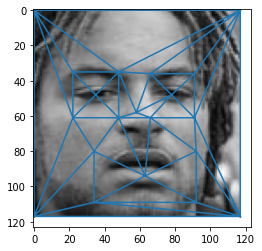

In [69]:
triangulations = delaunay.create_triangulations(keypoints)

for face_image, feature_points, triangulation in zip(face_images, keypoints, triangulations):
    if triangulation is None:
        continue
    plt.figure()
    plt.imshow(face_image, cmap='gray')
    plt.triplot(feature_points[:, 0], feature_points[:, 1], triangulation)
plt.show()

## Interpolate the triangulations

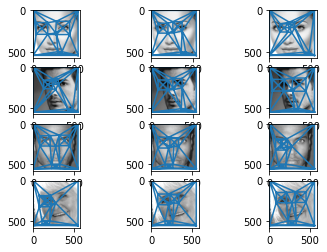

In [77]:
def get_image(file):
    return cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY)

def get_face(args):
    i, image = args
    faces = delaunay.detect_faces(image)
    assert len(faces) > 0
    return (i, *faces[0])

num_interpolations = 2
test_case_images = [
    ("case_2_1.png", "case_2_2.jpeg"),
    ("case_3_1.jpeg", "case_1_2.png"),
]

fig, ax = plt.subplots(len(test_case_images) * 2, num_interpolations + 1)
for test_case_index, files in enumerate(test_case_images):
    images = list(map(get_image, files))
    faces = list(map(get_face, enumerate(images)))
    cropped_faces = delaunay.crop_faces(images, faces)
    keypoints = delaunay.get_face_keypoints(cropped_faces)
    interpolations = delaunay.interpolate_triangulations(*keypoints, num_interpolations=num_interpolations)

    for image_index, (image, interpolation) in enumerate(zip(cropped_faces, interpolations)):
        for time_index, interpolated in enumerate(interpolation):
            relevant_ax = ax[test_case_index * 2 + image_index, time_index]
            relevant_ax.title("Step " + str(time_index) + "/" + str(num_interpot))
            relevant_ax.imshow(image, cmap='gray')
            relevant_ax.triplot(interpolated[0][:, 0], interpolated[0][:, 1], interpolated[1])
plt.show()

## Warp both images

## Cross-dissolve the colors

## Create video